In [42]:
import os 
from pathlib import Path
from typing import Tuple

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
import torchaudio

import pandas as pd
import numpy as np

C:\Users\JULIETH LOPEZ\.conda\envs\pytorch\lib\site-packages\torchaudio\extension\extension.py:13: UserWarning: torchaudio C++ extension is not available.
  warnings.warn('torchaudio C++ extension is not available.')


In [43]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [88]:
class SarcasmDataset(Dataset):
    
    def __init__(self, file_path: str):
        self.file_path=file_path 
        
        walker = sorted(str(p) for p in Path(self.file_path).glob(f'*/*'))
        self.walker = list(walker)
        
        
    def __getitem__(self, n: int) -> Tuple[torch.Tensor, str]:
        fileid = self.walker[n]
        label= self.walker[n].split('\\')[-2]
        
        relpath = os.path.relpath(fileid, self.file_path)
        label, filename = os.path.split(relpath)
        waveform, sample_rate = torchaudio.load(fileid)
        
        return waveform, sample_rate, label
    
    def __len__(self) -> int:
        return len(self.walker)

In [89]:
data=SarcasmDataset('../Audios/wav')

In [90]:
data.walker[0]#.split('\\')[-2]

'..\\Audios\\wav\\Normal_wav\\Audio_1.wav'

In [91]:
train_len=int(len(data)*0.8)
val_len=int(len(data)*0.2)

train_set, val_set=torch.utils.data.random_split(data, [train_len, val_len+1])

In [92]:
kwargs = {'num_workers': 1, 'pin_memory': True} if device == 'cuda' else {}

train_loader = torch.utils.data.DataLoader(train_set,shuffle = True, **kwargs)
val_loader = torch.utils.data.DataLoader(val_set,shuffle = True, **kwargs)


Normal_wav
tensor([[ 0.0000,  0.0000,  0.0000,  ..., -0.0002, -0.0018, -0.0035],
        [ 0.0000,  0.0000,  0.0000,  ..., -0.0002, -0.0018, -0.0035]])


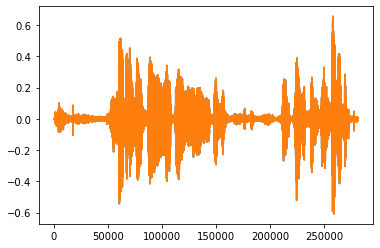

Shape of spectrogram: torch.Size([2, 201, 1406])


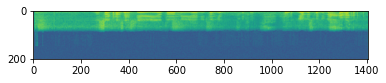


Normal_wav
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


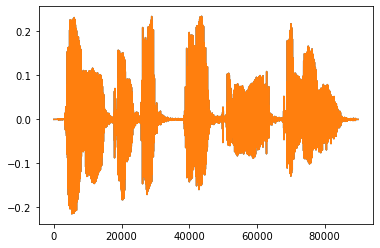

Shape of spectrogram: torch.Size([2, 201, 450])


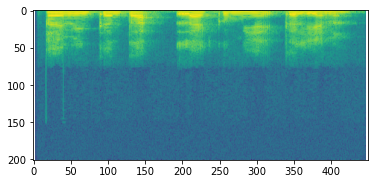


Normal_wav
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


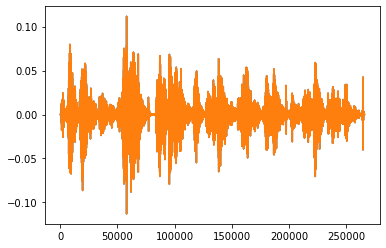

Shape of spectrogram: torch.Size([2, 201, 1331])


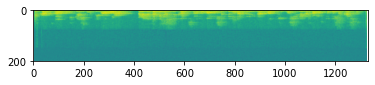


Normal_wav
tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 5.7983e-04, 1.0986e-03,
         2.1362e-04],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 4.5776e-04, 9.4604e-04,
         9.1553e-05]])


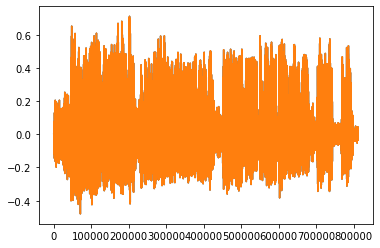

Shape of spectrogram: torch.Size([2, 201, 4061])


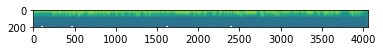


Normal_wav
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


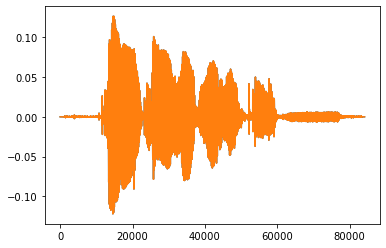

Shape of spectrogram: torch.Size([2, 201, 421])


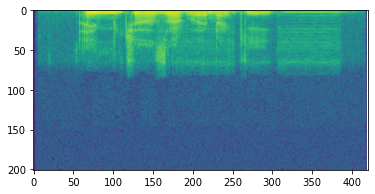


Normal_wav
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


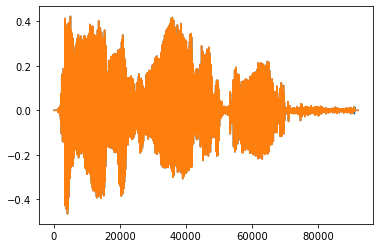

Shape of spectrogram: torch.Size([2, 201, 461])


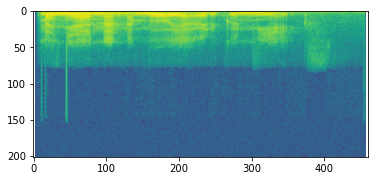


Normal_wav
tensor([[ 0.0000,  0.0000,  0.0000,  ..., -0.0006, -0.0006, -0.0005],
        [ 0.0000,  0.0000,  0.0000,  ..., -0.0006, -0.0008, -0.0006]])


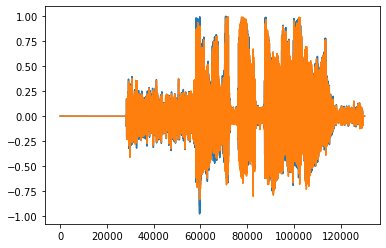

Shape of spectrogram: torch.Size([2, 201, 651])


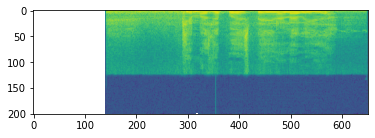


Normal_wav
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


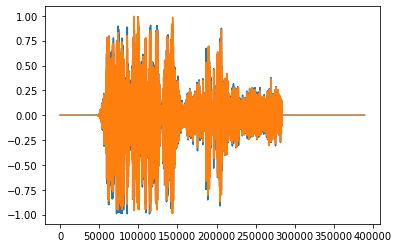

Shape of spectrogram: torch.Size([2, 201, 1947])


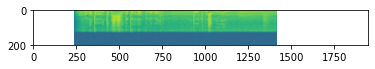


Normal_wav
tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 3.0518e-05,
         0.0000e+00]])


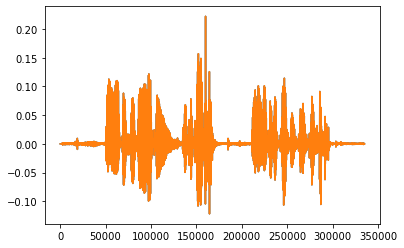

Shape of spectrogram: torch.Size([2, 201, 1677])


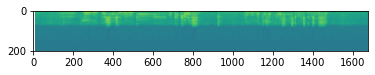


Sarcasmo_wav
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


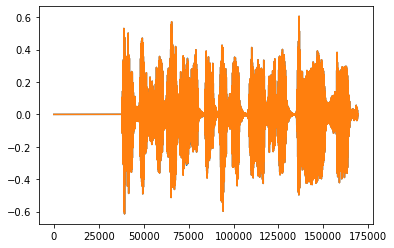

Shape of spectrogram: torch.Size([2, 201, 847])


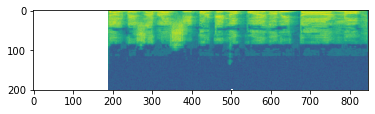


Normal_wav
tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0017, 0.0023, 0.0028],
        [0.0000, 0.0000, 0.0000,  ..., 0.0017, 0.0023, 0.0028]])


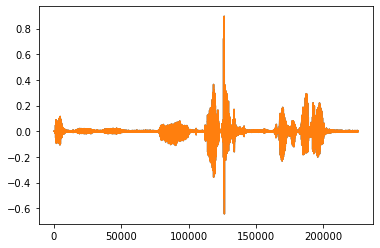

Shape of spectrogram: torch.Size([2, 201, 1129])


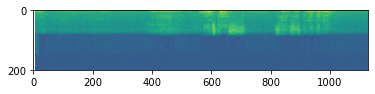


Normal_wav
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


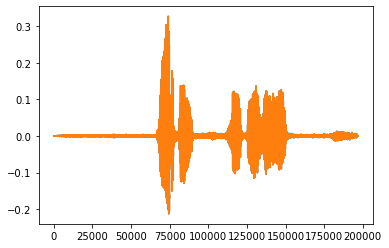

Shape of spectrogram: torch.Size([2, 201, 985])


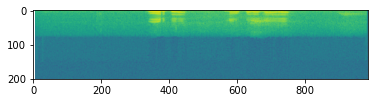


Normal_wav
tensor([[ 0.0000,  0.0000,  0.0000,  ..., -0.0011, -0.0008, -0.0006],
        [ 0.0000,  0.0000,  0.0000,  ..., -0.0011, -0.0008, -0.0006]])


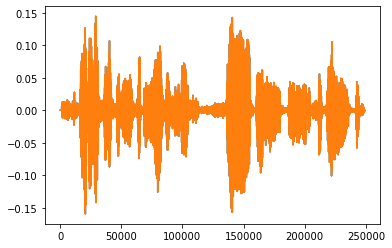

Shape of spectrogram: torch.Size([2, 201, 1245])


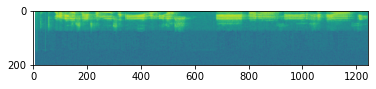


Normal_wav
tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0003, 0.0003, 0.0002],
        [0.0000, 0.0000, 0.0000,  ..., 0.0005, 0.0004, 0.0003]])


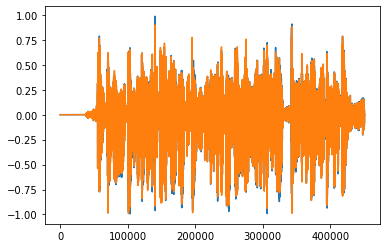

Shape of spectrogram: torch.Size([2, 201, 2253])


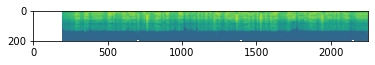


Normal_wav
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


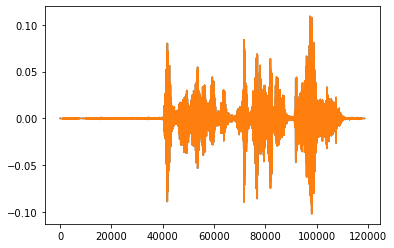

Shape of spectrogram: torch.Size([2, 201, 594])


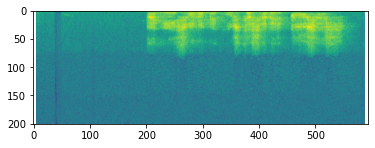


Normal_wav
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


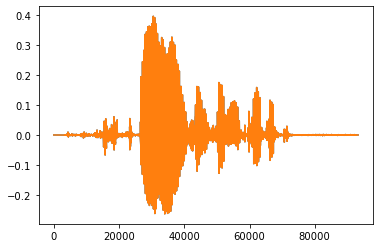

Shape of spectrogram: torch.Size([2, 201, 467])


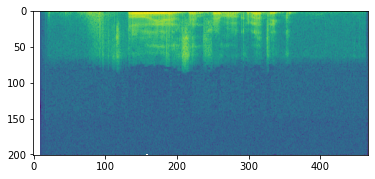


Normal_wav
tensor([[ 0.0000,  0.0000,  0.0000,  ..., -0.0027, -0.0038, -0.0043],
        [ 0.0000,  0.0000,  0.0000,  ..., -0.0027, -0.0038, -0.0043]])


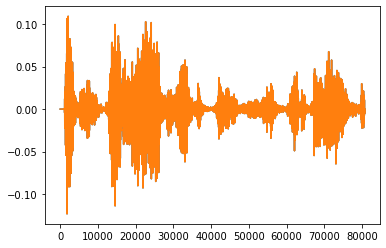

Shape of spectrogram: torch.Size([2, 201, 404])


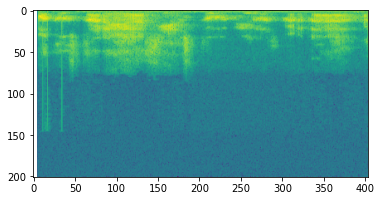


Normal_wav
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


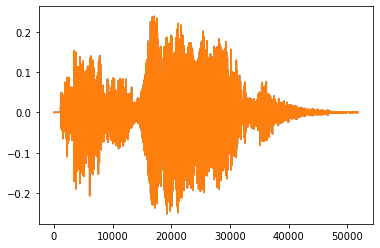

Shape of spectrogram: torch.Size([2, 201, 260])


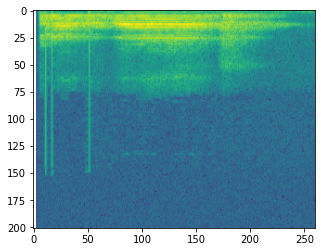


Normal_wav
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


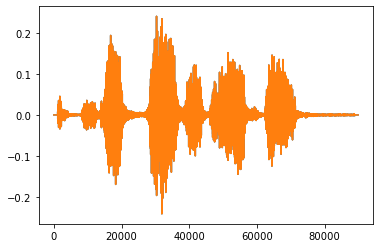

Shape of spectrogram: torch.Size([2, 201, 450])


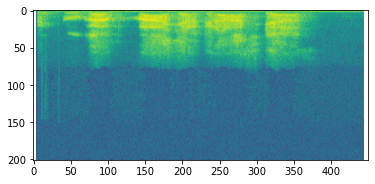


Normal_wav
tensor([[ 0.0000,  0.0000,  0.0000,  ..., -0.0001, -0.0001, -0.0001],
        [ 0.0000,  0.0000,  0.0000,  ..., -0.0001, -0.0001, -0.0001]])


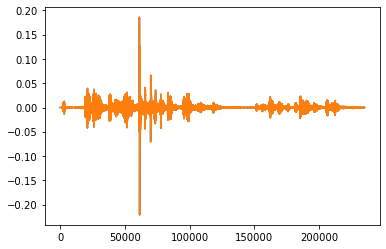

Shape of spectrogram: torch.Size([2, 201, 1176])


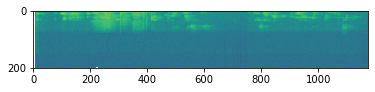


Normal_wav
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


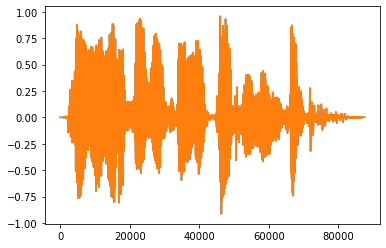

Shape of spectrogram: torch.Size([2, 201, 438])


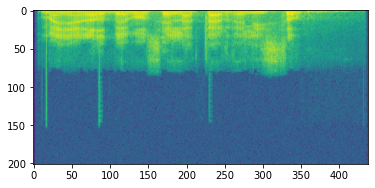


Normal_wav
tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0002, 0.0002, 0.0004],
        [0.0000, 0.0000, 0.0000,  ..., 0.0002, 0.0002, 0.0004]])


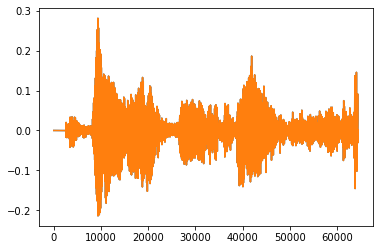

Shape of spectrogram: torch.Size([2, 201, 323])


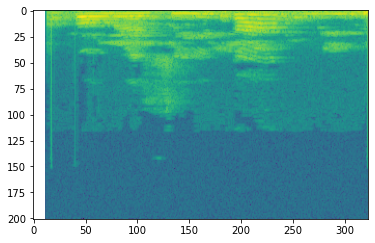


Normal_wav
tensor([[ 0.0000,  0.0000,  0.0000,  ..., -0.0007,  0.0021,  0.0012],
        [ 0.0000,  0.0000,  0.0000,  ..., -0.0004,  0.0016,  0.0009]])


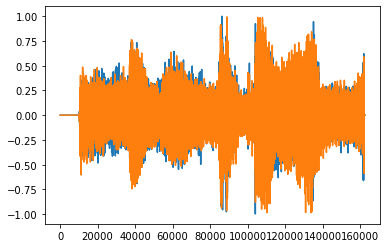

Shape of spectrogram: torch.Size([2, 201, 813])


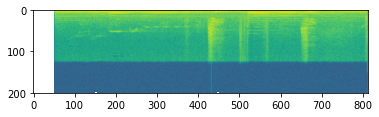


Normal_wav
tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 3.0518e-05,
         0.0000e+00]])


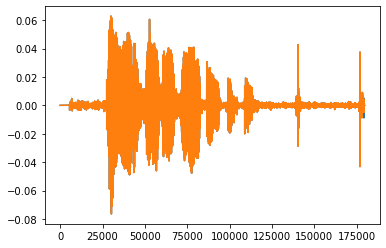

Shape of spectrogram: torch.Size([2, 201, 899])


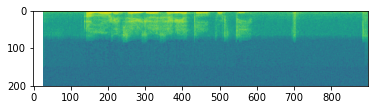


Normal_wav
tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0007, 0.0006, 0.0006],
        [0.0000, 0.0000, 0.0000,  ..., 0.0007, 0.0006, 0.0006]])


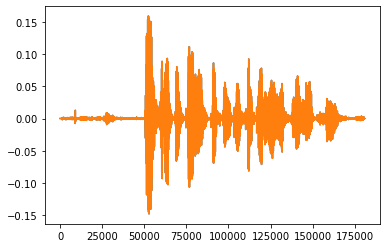

Shape of spectrogram: torch.Size([2, 201, 905])


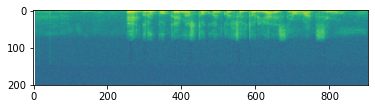

In [108]:
import matplotlib.pyplot as plt
for (waveform, sample_rate, label) in train_set:
    print("")
    print(label)
    print(waveform)
    # Waveform graph
    plt.plot(waveform.t().numpy())
    plt.show()
    # Spectrogram
    specgram = torchaudio.transforms.Spectrogram()(waveform)
    print('Shape of spectrogram:', specgram.size())
    plt.figure()
    plt.imshow(specgram.log2()[0, :, :].numpy())
    plt.show()

In [85]:
y, sr = librosa.load("../Audios/wav/Normal_wav/Audio_1.wav")
librosa.feature.melspectrogram(y=y, sr=sr)

array([[1.4124211e-04, 6.4624433e-04, 2.0889274e-03, ..., 2.6005891e-03,
        8.9461607e-04, 6.6318811e-04],
       [2.1077051e-04, 8.7722071e-04, 2.4391920e-03, ..., 1.4399672e-03,
        7.1109453e-04, 1.7961246e-03],
       [2.7493734e-04, 6.7092339e-04, 9.4860344e-04, ..., 2.6280112e-03,
        1.3145994e-03, 1.8213964e-03],
       ...,
       [1.7611904e-09, 9.3290134e-07, 8.9800005e-06, ..., 2.6329698e-09,
        2.8371492e-08, 8.7693945e-07],
       [8.1298412e-10, 3.4993195e-07, 2.6490550e-06, ..., 2.6378224e-09,
        2.4373136e-08, 7.6044637e-07],
       [4.5773423e-11, 2.9024948e-08, 2.8090284e-07, ..., 1.6430654e-10,
        1.5182454e-08, 5.0437274e-07]], dtype=float32)